<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/analisis_mozambique/feasible_products_proposition_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
# Librerías para visualizacion
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import re
import networkx as nx
from itertools import count
from itertools import combinations
from itertools import product
import statsmodels.api as sm
import urllib.request, json
!pip3 install geopandas
import geopandas
# -- set scientific notation to display numbers fully rather than exponential
pd.set_option('display.float_format', '{:.2f}'.format)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import seaborn as sns
sns.set_style('whitegrid') # grids en dark background

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',300)
print('librerías cargadas')

!pip install deepdiff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 35.4 MB/s eta 0:00:00
librerías cargadas
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.8 MB/s eta 0:00:00


# Importacion de la bases desde drive



Se importa la base desde drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
## Se importa la base de exportaciones de productos drive
df_base = pd.read_csv("/content/drive/MyDrive/eci/base/df_updated.csv")
df_short_name = pd.read_csv("/content/drive/MyDrive/eci/base/df_tipo_pro.csv")
df_gdp_pc = pd.read_csv("/content/drive/MyDrive/eci/base/gpd_per_capita_countries_db.csv")

print('dataframes cargados')

dataframes cargados


In [ ]:
df_base.describe()

,year,product_code,export_value
count,7373271.00,7373271.00,7373271.00
mean,2007.65,5304.58,42867657.55
std,7.44,2767.02,899054286.46
min,1995.00,101.00,0.00
25%,2001.00,2843.00,0.00
50%,2008.00,5402.00,1119.00
75%,2014.00,8102.00,432040.50
max,2020.00,9999.00,371679199232.00


In [ ]:
# df_base['product_code'] = df_base['product_code'].apply(lambda x: '{0:0>4}'.format(x))
# df['product_code']  = df['product_code'] .apply(np.int64)

df_base.sample(n=6)
df_base.info()

,year,country_code,country_name,product_code,product_name,export_value
45079,2020,MMR,Myanmar,202,Meat of bovine animals; frozen,35442
765295,2004,HTI,Haiti,1507,"Soya-bean oil and its fractions; whether or not refined, but not chemically modified",0
6600667,2004,KAZ,Kazakhstan,8701,Tractors; (other than tractors of heading no 8709),1731284
4214434,1997,ETH,Ethiopia,6212,"Brassieres, girdles, corsets, braces, suspenders, garters and similar articles and parts thereof; whether or not knitted or crocheted",0
2055512,1997,MRT,Mauritania,2928,Organic derivatives of hydrazine or of hydroxylamine,0
7098862,1996,NCL,New Caledonia,9209,"Musical instrument parts (eg mechanisms for musical boxes) and accessories (eg cards, discs and rolls for mechanical instruments), metronomes, tuning forks and pitch pipes",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373271 entries, 0 to 7373270
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   year          int64 
 1   country_code  object
 2   country_name  object
 3   product_code  int64 
 4   product_name  object
 5   export_value  int64 
dtypes: int64(3), object(3)
memory usage: 337.5+ MB


###Finding specific countries / products based on partial string matching If you’re interested in finding data on certain countries / products but not sure how exactly these are spelled in the data (or are spelled with / without e.g. capital letters)

In [ ]:
STRING = 'Netherland'
df_base[df_base['country_name'].str.contains(STRING)][['country_name']].drop_duplicates()

STRING = 'wine'
df_base[df_base['product_name'].str.contains(STRING,flags=re.IGNORECASE, regex=True)][['product_name']].drop_duplicates()

,country_name
156,Netherlands Antilles
3711,Netherlands


,product_name
11924,Swine; live
47696,"Meat of swine; fresh, chilled or frozen"
65582,"Edible offal of bovine animals, swine, sheep, goats, horses, asses, mules or hinnies; fresh, chilled or frozen"
1084954,"Wine of fresh grapes, including fortified wines; grape must other than that of heading no. 2009"
1090916,"Vermouth and other wine of fresh grapes, flavoured with plants or aromatic substances"
1156498,Wine lees; argol
3855058,"Twine, cordage, ropes and cables, whether or not plaited or braided; whether or not impregnated, coated, covered or sheathed with rubber or plastics"
3861020,"Twine, cordage or rope; knotted netting, made up fishing nets and other made up nets, of textile materials"
3866982,"Articles of yarn, strip or the like of heading no. 5404 or 5405; twine, cordage, rope or cables n.e.s. or included"
4302208,"Rags; used or new, scrap twine, cordage, rope and cables and worn out articles of twine, cordage, rope or cables, of textile materials"


#Limpieza de la base de GDP

###Selección de año a trabajar

In [ ]:
def filtrarBaseGDPporAnio (data,year):
  # years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
  yearselected = [year]
  data_filtered = data[(data['year'].isin(yearselected))].copy()
  data_filtered = data_filtered.reset_index(drop=True)

  return data_filtered

In [ ]:
def gdppc_countries(data):

    data = data.filter(items=['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']).copy()
    # years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
    # vecinos
    # df_eci_vecinos = df_ec[(df_ec['year'].isin(years)) & (df_ec['country_name'].isin(vecinos))].copy()

    data=data.rename(columns={"Country Name": "country_name", "Country Code": "country_code"}).copy()
    data=data.melt(id_vars=["country_name", "country_code"], var_name="year", value_name="Value").copy()
    data=data.rename(columns={"Value": "gdp_per_capita"}).copy()
    data =  data.loc[data["country_name"] != 'Latin America & the Caribbean (IDA & IBRD countries)' ].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (excluding high income)' ].copy()
    data =  data.loc[data["country_name"] != 'World' ].copy()
    data =  data.loc[data["country_name"] != 'Fragile and conflict affected situations'].copy()
    data =  data.loc[data["country_name"] != 'Pacific island small states'].copy()
    data =  data.loc[data["country_name"] != 'OECD members'].copy()
    data =  data.loc[data["country_name"] != 'Caribbean small states'].copy()
    data =  data.loc[data["country_name"] != 'Heavily indebted poor countries (HIPC)'].copy()
    data =  data.loc[data["country_name"] != 'Small states'].copy()
    data =  data.loc[data["country_name"] != 'East Asia & Pacific (excluding high income)'].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (IDA & IBRD countries)'].copy()
    data =  data.loc[data["country_name"] != 'Africa Eastern and Southern'].copy()
    data =  data.loc[data["country_name"] != 'Africa Western and Central'].copy()
    data =  data.loc[data["country_name"] != 'Middle East & North Africa (excluding high income)'].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia'].copy()
    data =  data.loc[data["country_name"] != 'Latin America & Caribbean (excluding high income)'].copy()



    ## No se consideran aquellos países indicados por region
    data =  data.loc[(data["country_name"] != 'Lower middle income') & (data["country_name"] != 'IBRD only')& (data["country_name"] != 'IDA total') & (data["country_name"] != 'East Asia & Pacific')
    &(data['country_name']!='Sub-Saharan Africa (excluding high income)')&(data['country_name']!='Low & middle income')&(data['country_name']!='Not classified')
    &(data['country_name']!='Middle East & North Africa (IDA & IBRD countries)')&(data['country_name']!='Post-demographic dividend')&(data['country_name']!='Latin America & Caribbean')
    &(data['country_name']!='Middle income')&(data['country_name']!='East Asia & Pacific (IDA & IBRD countries)')&(data['country_name']!='IDA & IBRD total') &(data['country_name']!='South Asia (IDA & IBRD)')
    &(data['country_name']!='South Asia')
    &(data['country_name']!='Least developed countries: UN classification')].copy()
    ## Se reemplaza actualiza los nombres de paises de la base del Banco Mundial para igualarlos con los de la base CONTRADE
    data=data.replace("Korea, Dem. People's Rep.", "North Korea").copy()
    data=data.replace("Korea, Rep.", "South Korea").copy()
    data=data.replace("Cote d'Ivoire", "Côte d'Ivoire").copy()
    data=data.replace("Congo, Dem. Rep.", "Congo (Democratic Republic of the)").copy()
    data=data.replace("Congo, Rep.", "Congo").copy()
    data=data.replace("Curacao", "Curaçao").copy()
    data=data.replace("British Virgin Islands","Virgin Islands (British)").copy()
    data=data.replace("Egypt, Arab Rep.","Egypt").copy()
    data=data.replace("Hong Kong SAR","Hong Kong").copy()
    data=data.replace("United States","United States of America").copy()
    data=data.replace("St. Vincent and the Grenadines","Saint Vincent and the Grenadines").copy()
    data=data.replace("Venezuela, RB","Venezuela").copy()
    data=data.replace("Czechia","Czech Republic").copy()
    data=data.replace("Gambia, The","Gambia").copy()
    data=data.replace('Bahamas, The',"Bahamas").copy()
    data=data.replace("Yemen, Rep.","Yemen").copy()
    data=data.replace("Slovak Republic","Slovakia").copy()
    data=data.replace("Iran, Islamic Rep.","Iran").copy()
    data=data.replace("Kyrgyz Republic","Kyrgyzstan").copy()
    data=data.replace("Macao SAR, China","Macao").copy()
    data=data.replace("Turkiye","Turkey").copy()
    data=data.replace("Lao PDR","Laos").copy()
    data=data.replace("Eswatini","Swaziland").copy()
    data=data.replace('St. Kitts and Nevis','Saint Kitts and Nevis').copy()
    data=data.replace('Micronesia, Fed. Sts.','Micronesia').copy()
    data=data.replace('Hong Kong SAR, China','Hong Kong').copy()
    data=data.replace('St. Lucia','Saint Lucia').copy()
    data=data.replace('North Macedonia','Macedonia').copy()
 

#  'Slovakia',Slovak Republic
#  'Iran', 'Iran, Islamic Rep.',
#  'Kyrgyzstan',  'Kyrgyz Republic',
#  'Macao', 'Macao SAR, China',
#  'Turkey', Turkiye
#  'Laos',  'Lao PDR',
#  'Swaziland',Eswatini

#  'Micronesia',  'Micronesia, Fed. Sts.',
#  'Hong Kong',  'Hong Kong SAR, China',
#  'Saint Lucia', 'St. Lucia',
#  'Macedonia',  'North Macedonia',

    data["year"]=data["year"].astype(np.int64).copy()
    data = data.reset_index(drop=True)

    return data

df_gdppc_countries=gdppc_countries(df_gdp_pc)

def changinColName(data):
  data = data.rename(columns={'country_name':'Country'})
  return data
  
df_gdppc_countries=changinColName(df_gdppc_countries)
df_gdppc_countries.head()



,Country,country_code,year,gdp_per_capita
0,Aruba,ABW,2000,21023.16
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,556.88
3,Albania,ALB,2000,1126.68
4,Andorra,AND,2000,21620.49


In [ ]:
# data['country name'] = data
dictTaiwn = { 'year': [2020, 2019, 2018, 2017, 2016, 2015,2014,2013,2012,2011,2010,2009,2008],
             'country_name': ['Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan','Taiwan' ],
             'gdp_per_capita': [28571.44,25903.17,25825.57,25061.62,23070.73,22752.99,22844.32,21945.46,21256.36,20838.59,19181.36,16904.54,18053.59]}
dftai = pd.DataFrame(dictTaiwn)
taiwan2018 = {'year': 2018,
              'Country': 'Taiwan',
              'gdp_per_capita':25825.57 }
taiwan2010 = {'year': 2010,
              'Country': 'Taiwan',
              'gdp_per_capita':19181.36 }
Palestine2018 = {'year':2018,
              'Country': 'Palestine',
              'gdp_per_capita':3562.33,}
Palestine2010 = {'year': 2010,
              'Country': 'Palestine',
              'gdp_per_capita':2557.08}
somalia2018 = {'year': 2018,
              'Country': 'Somalia',
              'gdp_per_capita':1124.735945}
somalia2010 = {'year': 2010,
              'Country': 'Somalia',
              'gdp_per_capita':223}
anguilla2010 = {'year': 2010,
              'Country': 'Anguilla',
              'gdp_per_capita':20461}
anguilla2018 = {'year': 2018,
              'Country': 'Anguilla',
              'gdp_per_capita':21241}
ptorico2010 = {'year': 2010,
              'Country': 'Puerto Rico',
              'gdp_per_capita':26461}
ptorico2018 = {'year': 2018,
              'Country': 'Puerto Rico',
              'gdp_per_capita':30416}
Afghanistan2010 = {'year': 2010,
              'Country': 'Afghanistan',
              'gdp_per_capita':521}
britishViginIslands2010 = {'year': 2010,
              'Country': 'Virgin Islands (British)',
              'gdp_per_capita':40431}
britishViginIslands2018 = {'year': 2018,
              'Country': 'Virgin Islands (British)',
              'gdp_per_capita':45554}
cookIslands2010 = {'year': 2010,
              'Country': 'Cook Islands',
              'gdp_per_capita':13990}
cookIslands2018 = {'year': 2018,
              'Country': 'Cook Islands',
              'gdp_per_capita':21023}
montserrat2010 = {'year': 2010,
              'Country': 'Montserrat',
              'gdp_per_capita':11242}
montserrat2018 = {'year': 2018,
              'Country': 'Montserrat',
              'gdp_per_capita':14420}


stMaarten2010= {'year': 2010,
              'Country': 'St-Martin / St Maarten',
              'gdp_per_capita':17640}
stMaarten2018= {'year': 2018,
              'Country': 'St-Martin / St Maarten',
              'gdp_per_capita':28988.3}
# dftai.head()



In [ ]:
df_gdppc_countries.loc[len(df_gdppc_countries)] = taiwan2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = taiwan2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = Palestine2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = Palestine2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = somalia2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = somalia2010

df_gdppc_countries.loc[len(df_gdppc_countries)] = anguilla2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = anguilla2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = ptorico2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = ptorico2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = britishViginIslands2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = britishViginIslands2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = cookIslands2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = cookIslands2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = montserrat2010
df_gdppc_countries.loc[len(df_gdppc_countries)] = montserrat2018
df_gdppc_countries.loc[len(df_gdppc_countries)] = stMaarten2010

df_gdppc_countries.loc[len(df_gdppc_countries)] = stMaarten2018



# df_gdppc_countries.loc[len(df_gdppc_countries)] = Afghanistan2010



df_gdppc_countries


,Country,country_code,year,gdp_per_capita
0,Aruba,ABW,2000,21023.16
1,Afghanistan,AFG,2000,NaN
2,Angola,AGO,2000,556.88
3,Albania,ALB,2000,1126.68
4,Andorra,AND,2000,21620.49
...,...,...,...,...
4749,Cook Islands,NaN,2018,21023.00
4750,Montserrat,NaN,2010,11242.00
4751,Montserrat,NaN,2018,14420.00
4752,St-Martin / St Maarten,NaN,2010,17640.00


In [ ]:

df_gpd2018=filtrarBaseGDPporAnio(df_gdppc_countries,2018)
df_gpd2018=df_gpd2018.rename(columns={'Country':'country_name'}).copy()
t_gdp_2018=df_gpd2018[['country_name','gdp_per_capita']].copy()
# t_gpd_2018 = t_gdp_2018['gdp_per_capita'].fillna(0).copy()
t_gdp_2018=t_gdp_2018.dropna(subset=['gdp_per_capita']).copy()

t_gdp_2018.sample(n=10)
t_gdp_2018.info()



,country_name,gdp_per_capita
205,Thailand,7124.56
16,Benin,1194.44
146,Mauritania,1749.95
245,Virgin Islands (British),45554.00
184,Singapore,66859.34
100,Iraq,5601.47
178,Romania,12494.48
255,Palestine,3562.33
206,Tajikistan,850.67
144,Northern Mariana Islands,25882.63


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 270
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    263 non-null    object 
 1   gdp_per_capita  263 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


## Cálculo de Complejidad Económica

### Paquetes ecomplexity

In [ ]:
!pip install ecomplexity
print('py-ecomplexity instalado')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ecomplexity: filename=ecomplexity-0.5.2-py3-none-any.whl size=11283 sha256=e9ce247541e42cbd41c7f386b31137f0e8a9b4ec884383c70077081bafdc01f2
  Stored in directory: /root/.cache/pip/wheels/c7/14/29/d28c7286333b75599f8f60681634819c63330cc3b89cf85f61
Successfully built ecomplexity
py-ecomplexity instalado


In [ ]:
from ecomplexity import ecomplexity
from ecomplexity import proximity

# To use py-ecomplexity, specify the following columns
# cols_input: dict of column names for time, location, product and value.
    #Example: {'time':'year', 'loc':'origin', 'prod':'hs92', 'val':'export_val'}
    
trade_cols = {'time':'year',
              'loc':'country_name',
              'prod':'product_name',
              'val':'export_value'}

print('Calculando complejidad económica')
df_ec = ecomplexity(df_base, trade_cols)
print('Cálculo finalizado')



Calculando complejidad económica
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
Cálculo finalizado


In [ ]:
df_complexity = df_ec[['country_name',
               'product_name',
               'product_code',
               'export_value',
               'rca',
               'mcp',
               'density',
               'year',
               'pci',
               'eci',
               'coi',
               'cog']].copy()

In [ ]:
# Muestro resultados
df_complexity.head(n=8)

,country_name,product_name,product_code,export_value,rca,mcp,density,year,pci,eci,coi,cog
0,Afghanistan,"Abrasive powder or grain; natural or artificial, on a base of textile material, of paper, paperboard or of other material, whether or not cut to shape or sewn or otherwise made up",6805,1327,0.05,0,0.04,1995,3.01,-0.33,-0.59,1.37
1,Afghanistan,Accordions and similar instruments; mouth organs,9204,0,0.00,0,0.03,1995,3.88,-0.33,-0.59,1.05
2,Afghanistan,"Acetals and hemiacetals; whether or not with other oxygen function, and their halogenated, sulphonated, nitrated or nitrostated derivatives",2911,0,0.00,0,0.03,1995,3.77,-0.33,-0.59,1.42
3,Afghanistan,"Acids; carboxylic acid with additional oxygen function and their anhydrides, halides, peroxides, peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2918,0,0.00,0,0.04,1995,2.37,-0.33,-0.59,0.99
4,Afghanistan,"Acids; polycarboxylic acids, their anhydrides, halides, peroxides and peroxy-acids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2917,0,0.00,0,0.05,1995,1.50,-0.33,-0.59,0.74
5,Afghanistan,"Acids; saturated acyclic monocarboxylic acids and their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2915,0,0.00,0,0.03,1995,3.03,-0.33,-0.59,1.30
6,Afghanistan,"Acids; unsaturated acyclic monocarboxylic, cyclic monocarboxylic , their anhydrides, halides, peroxides and peroxyacids; their halogenated, sulphonated, nitrated or nitrosated derivatives",2916,0,0.00,0,0.03,1995,3.33,-0.33,-0.59,1.51
7,Afghanistan,Acrylic polymers in primary forms,3906,0,0.00,0,0.03,1995,3.76,-0.33,-0.59,1.19


## Proposition #2
### Preparación de las tablas. 

In [ ]:
df_complexity_2018 = df_complexity[df_complexity['year']==2018].copy()
t_complex_2018 = df_complexity_2018.copy()
t_complex_2018=t_complex_2018[['country_name','eci','coi']]
# g = t_complex_2018.groupby(['country_name','eci','coi'])['coi'].apply(lambda x: list(np.unique(x)))
g = t_complex_2018.groupby(['country_name','eci','coi'],as_index=False)['coi'].apply(lambda x: list(np.unique(x)))
t_complex_2018 = pd.DataFrame(g).copy()
# t_complex_2018 = t_complex_2018[['country_name','eci','coi']].copy()
t_complex_2018 = t_complex_2018.rename(columns = {'eci':'eci_2018','coi':'coi_2018'})
# t_complex_2018['eci'] = t_complex_2018['eci'].astype(float, errors = 'raise')
print(t_complex_2018.dtypes)
t_complex_2018.head(n=5)
t_complex_2018.info()

paises_faltantes = t_complex_2018[t_complex_2018['country_name']=='French Southern and Antarctic Lands']
#  'Gibraltar',
#  'Heard and McDonald Islands',
#  'Mayotte',
#  'Montserrat',
#  'Netherlands Antilles',
#  'Niue',
#  'Norfolk Island',
#  'North Korea',
#  'Pitcairn',
#  'Saint Helena, Ascension and Tristan da Cunha',
#  'Saint Pierre and Miquelon',
#  'Somalia',
#  'South Georgia and South Sandwich Islds.',
#  'Tokelau',
#  'Undeclared Countries',
#  'United States Minor Outlying Islands'
print(paises_faltantes)

country_name     object
eci_2018        float64
coi_2018        float64
dtype: object


,country_name,eci_2018,coi_2018
0,Afghanistan,-1.23,-0.77
1,Albania,-0.35,0.11
2,Algeria,-1.26,-0.99
3,American Samoa,0.79,-0.46
4,Andorra,0.99,0.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  235 non-null    object 
 1   eci_2018      235 non-null    float64
 2   coi_2018      235 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.6+ KB
                           country_name  eci_2018  coi_2018
76  French Southern and Antarctic Lands      0.01     -0.88


In [ ]:
from deepdiff import DeepDiff
t1=t_complex_2018['country_name']
t2= t_gdp_2018['country_name']

set(t1).difference(set(t2))
# set(t1).symmetric_difference(set(t2))

# {'Anguilla',
#  'Antarctica',
#  'Bonaire',
#  'Bouvet Island',
#  'British Indian Ocean Territory',
#  'Christmas Island',
#  'Cocos (Keeling) Islands',
#  'Cook Islands',
#  'Eritrea',
#  'Falkland Islands',
#  'French Southern and Antarctic Lands',
#  'Gibraltar',
#  'Montserrat',
#  'Netherlands Antilles',
#  'Niue',
#  'Norfolk Island',
#  'North Korea',
#  'Pitcairn',
#  'Saint Barthélemy',
#  'Saint Helena, Ascension and Tristan da Cunha',
#  'Saint Pierre and Miquelon',
#  'South Georgia and South Sandwich Islds.',
#  'South Sudan',
#  'St-Martin / St Maarten',
#  'Tokelau',
#  'Undeclared Countries',
#  'United States Minor Outlying Islands',
#  'Vatican City',
#  'Venezuela',
#  'Virgin Islands (British)',
#  'Wallis and Futuna',
#  'Western Sahara'}

{'Antarctica',
 'Bonaire',
 'Bouvet Island',
 'British Indian Ocean Territory',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Eritrea',
 'Falkland Islands',
 'French Southern and Antarctic Lands',
 'Gibraltar',
 'Netherlands Antilles',
 'Niue',
 'Norfolk Island',
 'North Korea',
 'Pitcairn',
 'Saint Barthélemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Pierre and Miquelon',
 'South Georgia and South Sandwich Islds.',
 'South Sudan',
 'Tokelau',
 'Undeclared Countries',
 'United States Minor Outlying Islands',
 'Vatican City',
 'Venezuela',
 'Wallis and Futuna',
 'Western Sahara'}

### Merge de tablas: t_GDP + t_complex

In [ ]:
# df_gpd2018
# df3 = pd.concat([t_complex_2018, t_gdp_2018], axis=1).reset_index()

t_merged = pd.merge(t_complex_2018,t_gdp_2018,on=['country_name'], how='inner')
paises_agg = t_merged[t_merged['country_name']=='Somalia']
print(paises_agg)
t_merged.info()
# df3.head()

    country_name  eci_2018  coi_2018  gdp_per_capita
182      Somalia     -1.66     -1.04          379.99
183      Somalia     -1.66     -1.04         1124.74
184      Somalia     -1.66     -1.04         1124.74
185      Somalia     -1.66     -1.04         1124.74
186      Somalia     -1.66     -1.04         1124.74
187      Somalia     -1.66     -1.04         1124.74
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    233 non-null    object 
 1   eci_2018        233 non-null    float64
 2   coi_2018        233 non-null    float64
 3   gdp_per_capita  233 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.1+ KB


### Se hace el calculo de Log del GDP y se lo agrega al DF

In [ ]:
t_merged['log_gdp'] = np.log(t_merged['gdp_per_capita'])
t_merged.head()
t_merged.info()
# fil_df =t_merged.apply(lambda x: x.gdp_per_capita<1, axis=1)
fil_df=t_merged.dropna()
fil_df.info()
# fil_df.loc[['gdp_per_capita']].isna().sum().sum()


,country_name,eci_2018,coi_2018,gdp_per_capita,log_gdp
0,Afghanistan,-1.23,-0.77,502.06,6.22
1,Albania,-0.35,0.11,5287.66,8.57
2,Algeria,-1.26,-0.99,4171.80,8.34
3,American Samoa,0.79,-0.46,13195.94,9.49
4,Andorra,0.99,0.50,42903.44,10.67


<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    233 non-null    object 
 1   eci_2018        233 non-null    float64
 2   coi_2018        233 non-null    float64
 3   gdp_per_capita  233 non-null    float64
 4   log_gdp         233 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 232
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    233 non-null    object 
 1   eci_2018        233 non-null    float64
 2   coi_2018        233 non-null    float64
 3   gdp_per_capita  233 non-null    float64
 4   log_gdp         233 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.9+ KB


## Calculo de Residuos

<Axes: xlabel='eci_2018', ylabel='log_gdp'>

,eci_2018,coi_2018,gdp_per_capita,log_gdp,residuals
count,233.00,233.00,233.00,233.00,233.00
mean,-0.01,0.07,17171.78,8.91,-0.00
std,1.02,1.01,21367.82,1.44,0.73
min,-2.71,-1.97,231.45,5.44,-2.31
25%,-0.74,-0.79,2457.69,7.81,-0.51
50%,0.01,-0.20,7694.91,8.95,0.09
75%,0.71,0.75,23424.48,10.06,0.50
max,2.24,3.48,116786.51,11.67,2.09


,eci_2018,coi_2018,gdp_per_capita,log_gdp,residuals,residuals_norm
count,233.00,233.00,233.00,233.00,233.00,233.00
mean,-0.01,0.07,17171.78,8.91,-0.00,-0.00
std,1.02,1.01,21367.82,1.44,0.73,1.00
min,-2.71,-1.97,231.45,5.44,-2.31,-3.16
25%,-0.74,-0.79,2457.69,7.81,-0.51,-0.69
50%,0.01,-0.20,7694.91,8.95,0.09,0.13
75%,0.71,0.75,23424.48,10.06,0.50,0.68
max,2.24,3.48,116786.51,11.67,2.09,2.85


,country_name,eci_2018,coi_2018,gdp_per_capita,log_gdp,residuals,residuals_norm
0,Afghanistan,-1.23,-0.77,502.06,6.22,0.09,0.12
1,Albania,-0.35,0.11,5287.66,8.57,-0.17,-0.24
2,Algeria,-1.26,-0.99,4171.80,8.34,-0.97,-1.32
3,American Samoa,0.79,-0.46,13195.94,9.49,0.52,0.71
4,Andorra,0.99,0.50,42903.44,10.67,0.14,0.19


    country_name  eci_2018  coi_2018  gdp_per_capita  log_gdp  residuals  residuals_norm
135   Mozambique     -1.26     -0.65          504.54     6.22       0.06            0.08
   country_name  eci_2018  coi_2018  gdp_per_capita  log_gdp  residuals  residuals_norm
64      Ecuador     -0.89     -0.66         6321.35     8.75      -0.81           -1.10
   country_name  eci_2018  coi_2018  gdp_per_capita  log_gdp  residuals  residuals_norm
78      Germany      1.85     -1.97        47939.28    10.78       0.95            1.29


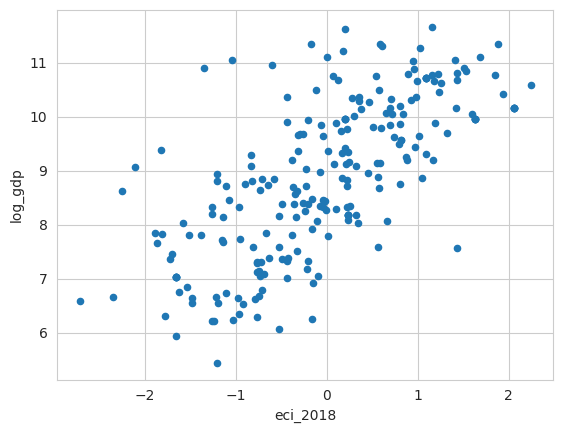

In [ ]:
import statsmodels.api as sm

# X1=fil_df['eci_2018']
# y=fil_df['log_gdp']

X1=fil_df['log_gdp']
y=fil_df['eci_2018']

X = sm.add_constant(X1)

fil_df.plot.scatter(x='eci_2018',y='log_gdp')

# m, b = np.polyfit(y, X, 1)

reg = sm.OLS(y, X).fit()

t_merged["residuals"] = reg.resid
fil_df["residuals"] = reg.resid

def cal_resiNorm(data):
  tf=data.copy()
  mean=tf['residuals'].mean()
  std=tf['residuals'].std()
  # coi_mean=tf['coi_2018'].mean()
  # coi_std=tf['coi_2018'].std()

  tf['residuals_norm'] = tf.apply(lambda x: (x.residuals-mean)/std, axis=1)
  # tf['coi_norm'] = tf.apply(lambda x: (x.coi_2018-coi_mean)/coi_std, axis=1)

  return tf

# fil_df.head()
fil_df.describe()
t_residuals = cal_resiNorm(fil_df).copy()
t_residuals.describe()
t_residuals.head()
print(t_residuals[t_residuals['country_name']=='Mozambique'])
print(t_residuals[t_residuals['country_name']=='Ecuador'])

print(t_residuals[t_residuals['country_name']=='Germany'])


(-3.0, 3.0)

(-4.0, 4.0)

Text(0.5, 0, 'Residuals de la regresión ECI-GDP per capita ')

Text(0, 0.5, 'Proximity to complex products (COI)')

Text(0.5, 1.0, 'La figura corresponder a la proposición 2 de feasible products [2018]')

Text(0.126, 0.96, 'Figura 15: Strategic approach [2018]')

Text(-0.807064760452141, -0.6642381802697896, 'Ecuador')

Text(0.058148204504902656, -0.6450983659816989, 'Mozambique')

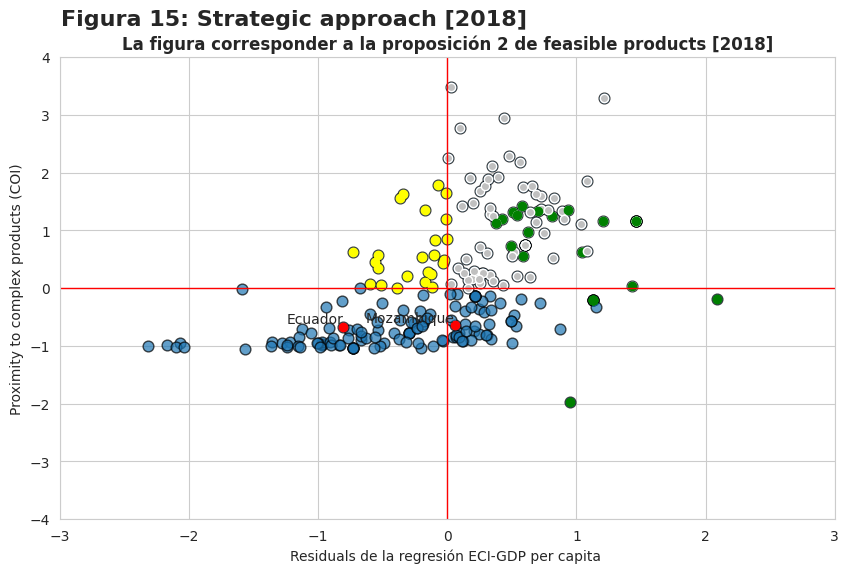

In [ ]:


# Initialize layout
fig, ax = plt.subplots(figsize = (10, 6))
ecipercentile90th=t_residuals.eci_2018.quantile(0.9)
eci2018 = t_residuals['eci_2018']
coi18 =  t_residuals['coi_2018']
residuals2018 =  t_residuals['residuals']
countries2018 = t_residuals['country_name']

ax.set_xlim(-3,3)
ax.set_ylim(-4, 4)

# ax2.set_xlim(0.865,1)

ax.scatter(residuals2018, coi18, s=60, alpha=0.7, edgecolors="k",cmap='silver')
# ax2.plot(xvalues,eci2014, color='red',linestyle='dashed')

ax.hlines(y=0, xmin=-3, xmax=3, linewidth=1, color='r')
ax.vlines(ymin=-4,ymax=4, x=0, linewidth=1, color='r')


# plt.plot(,df_final_moz['eci'], '"r-"')


ax.set_xlabel('Residuals de la regresión ECI-GDP per capita ')
ax.set_ylabel('Proximity to complex products (COI)')

plt.title("La figura corresponder a la proposición 2 de feasible products [2018]",fontsize=12,fontweight="bold")

plt.suptitle(
    "Figura 15: Strategic approach [2018]",
    fontsize=16,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# color = [str(item/255.) for item in pci2018]
# y = np.random.random(89)

#Se añade el label y el color sólo a Ecuador. 

for (resiz,coiz,countz,eciz) in zip(residuals2018,coi18,countries2018,eci2018):
        if (coiz >= 0 and resiz <= 0):
          plt.scatter(resiz,coiz, color='yellow')
        if (countz=='Mozambique' or countz=='Ecuador'):
          plt.scatter(resiz,coiz,color='red')
          plt.text(resiz,coiz, countz, va='bottom', ha='right')
        if (coiz >= 0 and resiz > 0):
          plt.scatter(resiz,coiz, edgecolors='white', color='silver')
        if (eciz>=1.223):
          plt.scatter(resiz,coiz,color='green')
          # plt.text(resiz,coiz, countz, va='bottom', ha='right')  
  


plt.show()


# ax2.set_ylabel("ECI de Mozambique [2014]", fontsize=14)

# fig.autofmt_xdate()

In [ ]:
ecipercentile90th=t_residuals.eci_2018.quantile(0.9)
ecipercentile90th

1.3065402074579449